In [2]:
#imports module to download market data
from pandas_datareader import data

In [3]:
symbol = 'SBICARD.NS'        #use yahoo symbols
start_date = '2018-12-01'    #start dates for historical data
end_date = '2021-01-01'

In [4]:
#downloading data
tatamotors_data = data.DataReader(symbol,'yahoo',start_date,end_date)

In [5]:
import pandas as pd
import numpy as np

In [6]:
tatamotors_signal = pd.DataFrame(index=tatamotors_data.index)

Here we use most simple strategy which is to buy low and sell high. Our first algorithmic trading (buy when the price is low, and sell when the price is high), for the buy low sell high example, we will calculate the difference in the adjusted close between two consecutive days. If the value of the adjusted close is negative, this means the price on the previous day was higher than the price the following day, so we can buy since the price is lower now. If this value is positive, this means that we can sell because the price is higher.

In [7]:
tatamotors_signal['Price'] = tatamotors_data['Adj Close']

In [8]:
tatamotors_signal['Price Difference'] = tatamotors_data['Adj Close'].diff()

In [9]:
tatamotors_signal['Signal'] = 0
tatamotors_signal['Signal'] = np.where(tatamotors_signal['Price Difference'] >= 0, 1.0, 0.0)
tatamotors_signal['Position'] = tatamotors_signal['Signal'].diff()

In [35]:
import matplotlib.pyplot as plt

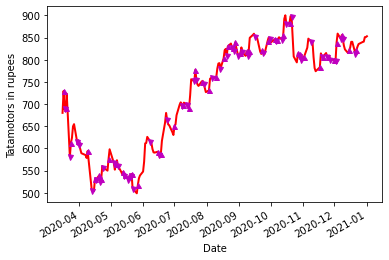

In [36]:
fig = plt.figure()
chart = fig.add_subplot(111,ylabel='Tatamotors in rupees')
tatamotors_signal['Price'].plot(ax=chart, color='r', lw = 2.0)
chart.plot(tatamotors_signal.loc[tatamotors_signal.Position == 1.0].index, 
           tatamotors_signal.Price[tatamotors_signal.Position == 1.0], "^", markersize = 5, color = 'm')
chart.plot(tatamotors_signal.loc[tatamotors_signal.Position == -1.0].index, 
           tatamotors_signal.Price[tatamotors_signal.Position == -1.0], "v", markersize = 5, color = 'm')
plt.show()

In [37]:
intial_capital = float(1000.0)

In [38]:
positions = pd.DataFrame(index=tatamotors_signal.index).fillna(0.0) 
portfolio = pd.DataFrame(index=tatamotors_signal.index).fillna(0.0)

In [39]:
positions['tatamotors'] = tatamotors_signal['Signal']
portfolio['positions'] = (positions.multiply(tatamotors_signal['Price'], axis=0))

In [40]:
portfolio['cash'] = intial_capital - (positions.diff().multiply(tatamotors_signal['Price'], axis=0)).cumsum()

In [41]:
portfolio['total'] = portfolio['positions'] + portfolio['cash']

In [44]:
profit = portfolio.iloc[len(portfolio['cash'])-1][2]-intial_capital

In [45]:
profit

56.53765869140625

In [23]:
tatamotors_signal['Date']

KeyError: 'Date'